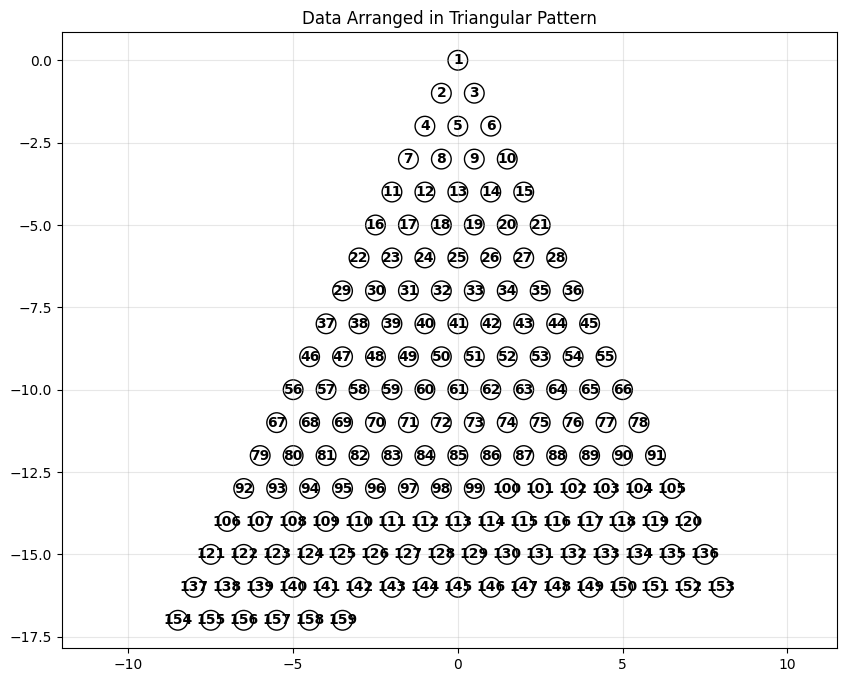

In [8]:
# Triangular Data Visualization
import matplotlib.pyplot as plt
import numpy as np

# Your data - replace this with your actual dataset
data = list(range(1, 160))  # Example: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

def arrange_triangular(data):
    """Convert linear data array into triangular coordinates"""
    coords = []
    row = 0
    position_in_row = 0
   
    for i, value in enumerate(data):
        # Calculate x, y coordinates for triangular arrangement
        x = position_in_row - row / 2  # Center the triangle
        y = -row  # Rows go downward
       
        coords.append((x, y, value))
       
        position_in_row += 1
       
        # Move to next row when current row is filled
        if position_in_row > row:
            row += 1
            position_in_row = 0
           
    return coords

# Convert data to triangular coordinates
triangle_coords = arrange_triangular(data)
x_coords = [coord[0] for coord in triangle_coords]
y_coords = [coord[1] for coord in triangle_coords]
values = [coord[2] for coord in triangle_coords]

# Create the visualization with unfilled circles
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_coords, y_coords, s=200, 
                     facecolors='none', edgecolors='black', linewidth=1)

# Add value labels on each point
for i, (x, y, val) in enumerate(triangle_coords):
    plt.annotate(str(val), (x, y), ha='center', va='center', fontweight='bold')

plt.title('Data Arranged in Triangular Pattern')
plt.axis('equal')  # Keep aspect ratio square
plt.grid(True, alpha=0.3)
plt.show()

Checked up to n=8000 / 8000
Total wrong guesses found: 1695
Unique incorrect guess values: 434
Visualizing first 55 incorrect guesses in triangle


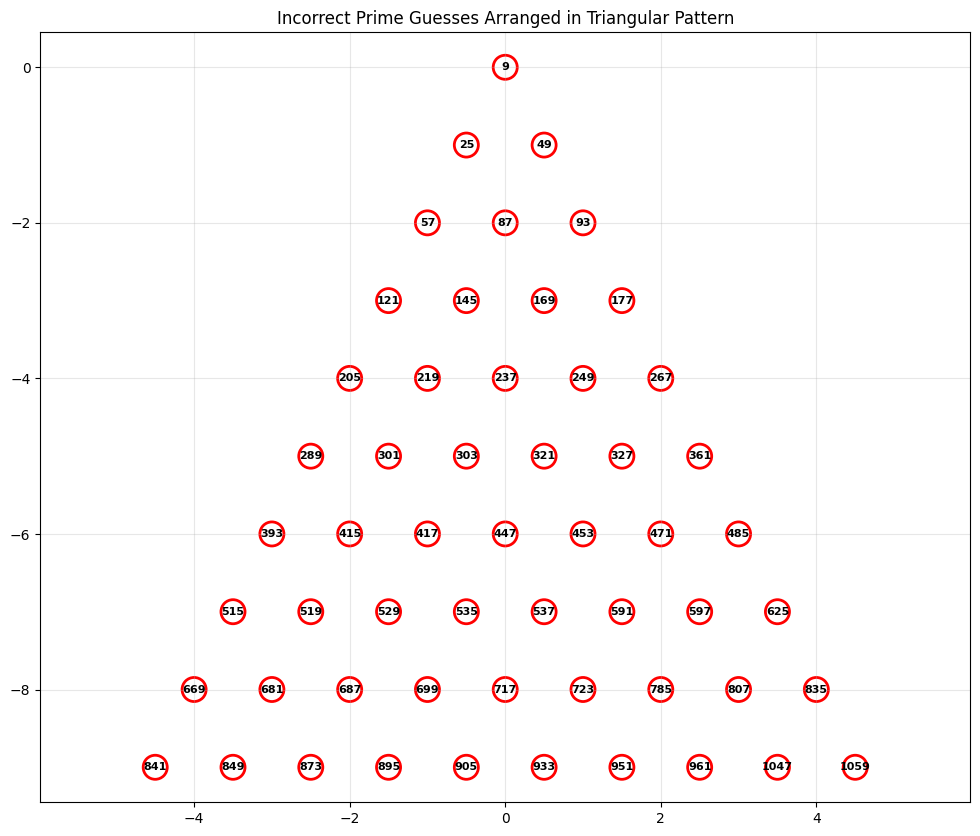

In [10]:
import math
import sympy
import matplotlib.pyplot as plt
import numpy as np

def find_potential_prime(n, max_range_type='sqrt'):
    if max_range_type == 'sqrt':
        upper_bound = math.ceil(math.sqrt(n))
    elif max_range_type == 'half':
        upper_bound = max(2, math.ceil(n/2))
    elif max_range_type == 'n-sqrt':
        upper_bound = max(2, n - math.ceil(math.pow(n, 1/2)))
    elif max_range_type == 'n':
        upper_bound = max(2, n)
    elif max_range_type == 'ndiv':
        upper_bound = max(2, math.ceil(n / 2))
    else:
        upper_bound = n
    numbers = list(range(2, upper_bound))
    remainders_set = set()
    for i in numbers:
        remainders_set.add(i - (n % i))
    m = 1 if n % 2 == 0 else 2
    while m in remainders_set:
        m += 2
    primetest = n + m
    is_prime = sympy.isprime(primetest)
    return primetest, is_prime, m, upper_bound

max_n = 8000
wrong_to_correct_map = {}
progress_step = max_n // 100 if max_n >= 100 else 1

for n in range(1, max_n + 1):
    primetest, is_prime, m, upper_bound = find_potential_prime(n, max_range_type='sqrt')
    if not is_prime:
        # Rerun with wider range
        correcttest, correct_is_prime, correct_m, correct_upper_bound = find_potential_prime(n, max_range_type='n')
        if correct_is_prime:
            wrong_to_correct_map[(n, primetest, is_prime, m, upper_bound)] = (correcttest, correct_is_prime, correct_m, correct_upper_bound)
    if n % progress_step == 0 or n == max_n:
        print(f"Checked up to n={n} / {max_n}", end='\r', flush=True)

print()

# Create set of incorrect guess values
incorrect_guesses = set()
for (n, primetest, is_prime, m, upper_bound), (correcttest, correct_is_prime, correct_m, correct_upper_bound) in wrong_to_correct_map.items():
    incorrect_guesses.add(primetest)

print(f"Total wrong guesses found: {len(wrong_to_correct_map)}")
print(f"Unique incorrect guess values: {len(incorrect_guesses)}")

# Convert to sorted list and limit to triangle size (10 rows = 55 positions)
triangle_size = 10
max_positions = sum(range(1, triangle_size + 1))  # 1+2+3+...+10 = 55
data = sorted(list(incorrect_guesses))[:max_positions]

print(f"Visualizing first {len(data)} incorrect guesses in triangle")

def arrange_triangular(data):
    """Convert linear data array into triangular coordinates"""
    coords = []
    row = 0
    position_in_row = 0
   
    for i, value in enumerate(data):
        # Calculate x, y coordinates for triangular arrangement
        x = position_in_row - row / 2  # Center the triangle
        y = -row  # Rows go downward
       
        coords.append((x, y, value))
       
        position_in_row += 1
       
        # Move to next row when current row is filled
        if position_in_row > row:
            row += 1
            position_in_row = 0
           
    return coords

# Convert data to triangular coordinates
triangle_coords = arrange_triangular(data)
x_coords = [coord[0] for coord in triangle_coords]
y_coords = [coord[1] for coord in triangle_coords]
values = [coord[2] for coord in triangle_coords]

# Create the visualization with unfilled circles
plt.figure(figsize=(12, 10))
scatter = plt.scatter(x_coords, y_coords, s=300, 
                     facecolors='none', edgecolors='red', linewidth=2)

# Add value labels on each point
for i, (x, y, val) in enumerate(triangle_coords):
    plt.annotate(str(val), (x, y), ha='center', va='center', fontweight='bold', fontsize=8)

plt.title('Incorrect Prime Guesses Arranged in Triangular Pattern')
plt.axis('equal')  # Keep aspect ratio square
plt.grid(True, alpha=0.3)
plt.show()